# Final Project


<br>
<br>



___

### Overview:

* **Name**:  Tomasz Baczkun
* **Student number**:  B990367246
* **Project theme**:  Identifying the risk factors responsible for maternal mortality in Bangladesh's rural areas.




<br>

### Purpose:

* This analysis aims to identify key factors that contribute to the risk level of maternal mortality.
* Key **dependent** variable: Risk Level of Maternal Mortality (RiskLevel) - a categorical variable with 3 levels.
* Key **independent** variables:
  - Age
  - Systolic Blood Pressure (SystolicBP)
  - Diastolic Blood Pressure (DiastolicBP)
  - Blood Sugar (BS)
  - Body Temperature (BodyTemp)
  - Heart Rate (HeartRate)

All of the aforementioned IVs are continuous.
<br>
* Dataset size: 6 IV and 1 DV. 1014 cases in total.

<br>

### Dataset source:

The data were obtained from [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php).

Here you can download [Maternal Health Risk Dataset](https://archive.ics.uci.edu/dataset/863/maternal+health+risk) that was used for the analysis purposes.

There is an existing analysis of the dataset published by Ahmed et al. (2020).

**References**:

Ahmed, M., Kashem, M. A., Rahman, M., & Khatun, S. (2020). Review and analysis of risk factor of maternal health in remote area using the Internet of Things (IoT). In Lecture notes in electrical engineering (pp. 357–365). https://doi.org/10.1007/978-981-15-2317-5_30

## Part 1: Dataset description

#### Dictionary:

- age: Age [years]
- systolic_bp : Systolic Blood Pressure [mmHg]
- diastolic_bp: Diastolic Blood Pressure [mmHg]
- bs: Level of Sugar in Blood [mmol/L]
- body_temp: Temperature of the Body [°F]
- heart_rate: Heart Rate [bpm] 

In [7]:
from modules.fp_prep_and_hp import df_load
df = df_load()

In [8]:
import pandas as pd
df.describe()

age  systolic_bp  diastolic_bp          bs   body_temp  \
count  451.000000   451.000000    451.000000  451.000000  451.000000   
mean    29.223947   110.532151     75.419069    8.347162   98.694013   
std     13.768594    17.886574     13.769838    2.832273    1.412086   
min     10.000000    70.000000     49.000000    6.000000   98.000000   
25%     19.000000    90.000000     65.000000    6.900000   98.000000   
50%     25.000000   120.000000     80.000000    7.500000   98.000000   
75%     35.000000   120.000000     87.000000    7.900000   98.000000   
max     70.000000   160.000000    100.000000   19.000000  103.000000   

       heart_rate  
count  451.000000  
mean    74.097561  
std      7.530045  
min     60.000000  
25%     70.000000  
50%     76.000000  
75%     80.000000  
max     90.000000

The six factors above are the ones used in the analysis. After preprocessing, all of them are in a range of possible scores. What is worth mentioning is that body temperature, due to it's nature, behaves differently to other factors, namely appears restricted in number of possible values. Middle 50% of the data all have the same value. This can affect further analysis.

Let's take a look at each of the factors with regard to the level of risk of a mother dying during childbirth.

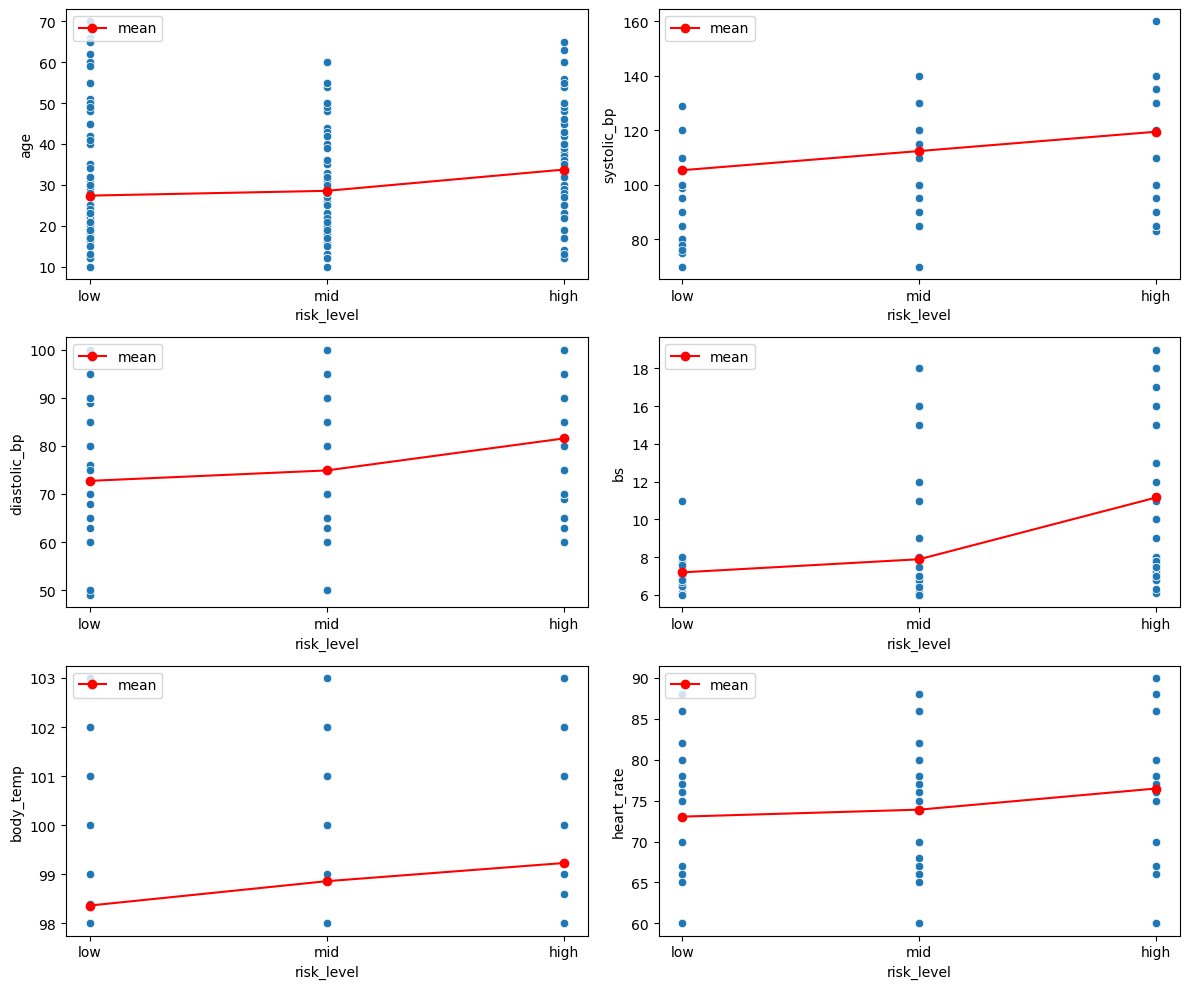

In [11]:
from modules.mean_plots import risk_plots
risk_plots(df)

There seems to be an overarching trend in all of the categories - the higher the score, the higher the risk.

There are many possible reasons for such a combination, such as stress, anxiety, obesity, unhealthy diet, adrenal disorder. However, it might indicate that **malnutrition** is not the crucial cause of the trouble, at least in rural areas of Bangladesh. That would be a comforting thought, taking into account that Bangladesh hunger statistics are above 11% (for comparison, Japan is only 3.2%).

Additionaly, in some cases the difference between high and medium risk level is far more evident than difference between medium and low level. This might indicate that the medium risk level was misassigned, and in the future should be given a special attention.

Let us statisticaly verify that there are indeed some differences that are not due to chance.

## Part 2: Hypothesis Testing

In [14]:
from modules.MANOVA import manova_table
manova_table(df)

                     Multivariate linear model
                                                                    
--------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF    F Value   Pr > F
--------------------------------------------------------------------
          Wilks' lambda    0.0003 6.0000 443.0000 250761.7070 0.0000
         Pillai's trace    0.9997 6.0000 443.0000 250761.7070 0.0000
 Hotelling-Lawley trace 3396.3211 6.0000 443.0000 250761.7070 0.0000
    Roy's greatest root 3396.3211 6.0000 443.0000 250761.7070 0.0000
--------------------------------------------------------------------
                                                                    
---------------------------------------------------------------------
         risk_level        Value    Num DF   Den DF   F Value  Pr > F
---------------------------------------------------------------------
            Wilks' lambda  0.5295  12.0000  886.0000 

MANOVA shows that there are differences in the data that are not due to chance. In other words, at least some of the above mentioned differences actually exist - are more than just a coincidence.

As further analysis (multiple ANOVA's with Holm-Bonferroni correction) indicate that in case of all factors there is a meaningful difference, let us see statistical differences within the two groups (Tukey HSD) that provide most, and least impact over the dependent variable, starting with Blood Sugar Level.

*For used package, meandiff is caluclated as follows: group2 - group1*

In [18]:
from modules.selected_tukey_hsd import bs_results
bs_results(df)

Results for Dependent Variable: Blood Sugar

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low  -3.9665    0.0 -4.5912 -3.3419   True
  high    mid  -3.2718    0.0  -4.008 -2.5356   True
   low    mid   0.6947 0.0285  0.0583  1.3312   True
----------------------------------------------------


There is a clear, strong increasing trend, with the differences between high and other levels being of very significant importance (p value: 0.0). Even though the difference between low and mid level has a higher p value (0.0285), it is still present and significant. It would thus seem that the higher the blood sugar level, the higher the risk of mother's death during childbirth. 

Let's move on to the factor that does not seem to be so impactful.

In [20]:
from modules.selected_tukey_hsd import heart_rate_results
heart_rate_results(df)

Results for Dependent Variable: Heart Rate

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  high    low  -3.4392 0.0002 -5.4434  -1.435   True
  high    mid  -2.5859 0.0279 -4.9479 -0.2239   True
   low    mid   0.8533 0.5883 -1.1888  2.8954  False
----------------------------------------------------


If we were to look just at the main difference, the increasing trend is still present. However only two out of the three comparisons are significant. The meaningful difference between low and mid risk level could not be proven (p value: 0.5883).

## Part 3: Machine Learning

### Classification Tree Scores
*See Appendix 1*

|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| High           | 0.91      | 0.75   | 0.82     | 53      |
| Low            | 0.81      | 0.93   | 0.87     | 60      |
| **Accuracy**   |           |        | **0.85**     | 113     |
| **Macro Avg**  | 0.86      | 0.84   | 0.85     | 113     |
| **Weighted Avg** | 0.86    | 0.85   | 0.85     | 113     |

The model used is a classification tree. 

In the course of modifications, I included medium risk level into high-risk level category (accuracy went from 75% to 85%) and removed inefficient variables, namely diastolic blood pressure and heart rate (accuracy remained unchanged). Feature distributions remained approximately the same.

The model is able to predict approximately **85%** of the cases correctly.

As we are discussing medical case, it is crucial to identify someone of high risk correctly. 75% of women at high risk will be correctly identified, leaving 25% of women misidentified, which might lead to insufficient care. At the same time, 81% of positive predictions about someone being at low risk are correct, meaning that 19 remaining percent of cases will be misidentified as low risk. 

At the moment, the model is best at identifying people at low risk. This is not ideal. For such medical data, model ideally would overestimate number of people at high risk, so that everyone can get a treatment no worse than they deserve.

It is worth mentioning though, that it also depends on the hospital's capacity. If medical institutions in Bangladesh are underequipped or understaffed, then they might find themselves unable to handle too many people requiring high quality care, which would eventually lead to it's decrease in quality at the highest level.

The issue is complex and needs to be tailored to the specific setting.

<img src="images/img1.png" width="750" height="750">

Blood level in sugar appears as the most important factor in detecting high risk, followed by systolic blood pressure. Heightened levels of those two factors are a common indication of diabetes or a poor diet in general. Although it demands further investigation to adress an extent to which inappropriate nutrition is responsible of mother's deaths during childbirth, this analysis can be a valuable indication.

Suggesting another direction of research, high cortisol, caused by stress, is also positively associated with blood sugar levels. Taking into account potentially poor living conditions in Bangladesh, this also might be a valuable insight.

Let us perform more advance method involving classification tree, random forest, and examine wether it brought about a significant improvement or new insights.

### Random Forest Scores
*See Appendix 2*
|                | Precision | Recall | F1-Score | Support |
|----------------|-----------|--------|----------|---------|
| High           | 0.88      | 0.81   | 0.85     | 27      |
| Low            | 0.94      | 0.97   | 0.95     | 86      |
| **Accuracy**   |           |        | **0.93**     | 113     |
| **Macro Avg**  | 0.91      | 0.89   | 0.90     | 113     |
| **Weighted Avg** | 0.93    | 0.93   | 0.93     | 113     |

In the course of modifications, I included medium risk level into low-risk level category. All of the variables were retained. Feature distributions remained approximately the same, except for low-risk blood sugar group, which gained some right-tailed outliers.

One obvious improvement over the previous model is the accuracy. It went from 85% to **93%**. Additionally, recall for high-risk group improved by 6%, meaning that 81% people that are of high risk will be correctly classified. Precision for low-risk category improved by 13%, meaning that only 6% of people predicted to be in a low-risk category will be misclassified, and actually in need of more advanced help.

While these improvements seem to be considerably large, they comes at a cost. As of now, every person who was before classified as medium-risk is now reduced to the low-risk category. In other words, the model is now more effective at detecting people of high risk properly, but possibly underestimates the quality of help required by people with medium-level threats. 

Which model should be applied depends on where the medium-risk category lies on the spectrum between low and high risk. If the medium category shows more similarities with the low-level risk category, and the danger is not much more grave, then the second model should be considered. Otherwise, if the medium-level category is only slightly less deadly than the high-risk, the first model would be a more responsible way to proceed.

Additionally, if domain experts insist on the importance of heart rate and diastolic blood pressure in the process of prediction, only the second model would be acceptable.

<img src="images/img2.png" width="750" height="750">

Minor changes occurred, however, the pattern still holds. Diastolic blood pressure and heart rate are still the least impactful features. Blood level in sugar and systolic blood pressure continue to affect the model to the largest extent, pointing at sugar-related issues, such as excessive stress, diabetes, or simply a poor diet.